# Project Pollution tracker Case study


## Importing libraries 

In [136]:
import pandas as pd


In [137]:
import numpy as np
from matplotlib import pyplot as plt

## importing the CSV file 

In [139]:
data=pd.read_csv(r'C:\DA-2023\Pollution case study\Data sets\pollution_2000_2023.csv')

In [140]:
data.head()

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


# Data Pre-Processing

## Running info command to check the column details and null values 

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665414 entries, 0 to 665413
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         665414 non-null  int64  
 1   Date               665414 non-null  object 
 2   Address            665414 non-null  object 
 3   State              665414 non-null  object 
 4   County             665414 non-null  object 
 5   City               665414 non-null  object 
 6   O3 Mean            665414 non-null  float64
 7   O3 1st Max Value   665414 non-null  float64
 8   O3 1st Max Hour    665414 non-null  int64  
 9   O3 AQI             665414 non-null  int64  
 10  CO Mean            665414 non-null  float64
 11  CO 1st Max Value   665414 non-null  float64
 12  CO 1st Max Hour    665414 non-null  int64  
 13  CO AQI             665414 non-null  float64
 14  SO2 Mean           665414 non-null  float64
 15  SO2 1st Max Value  665414 non-null  float64
 16  SO

In [144]:
data.isnull().sum()

Unnamed: 0           0
Date                 0
Address              0
State                0
County               0
City                 0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
dtype: int64

## No null values were observed , data seems to be fine without the null values , however the column unanmed: o is not required , we need to drop it 

In [146]:
data.drop('Unnamed: 0',axis=1, inplace=True)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665414 entries, 0 to 665413
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               665414 non-null  object 
 1   Address            665414 non-null  object 
 2   State              665414 non-null  object 
 3   County             665414 non-null  object 
 4   City               665414 non-null  object 
 5   O3 Mean            665414 non-null  float64
 6   O3 1st Max Value   665414 non-null  float64
 7   O3 1st Max Hour    665414 non-null  int64  
 8   O3 AQI             665414 non-null  int64  
 9   CO Mean            665414 non-null  float64
 10  CO 1st Max Value   665414 non-null  float64
 11  CO 1st Max Hour    665414 non-null  int64  
 12  CO AQI             665414 non-null  float64
 13  SO2 Mean           665414 non-null  float64
 14  SO2 1st Max Value  665414 non-null  float64
 15  SO2 1st Max Hour   665414 non-null  int64  
 16  SO

## Running Describe command to check statistics of table 

In [149]:
data.describe()

,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000
mean,0.028605,0.038980,10.766409,39.137872,0.329459,0.465604,5.922553,5.247399,1.428759,3.931057,8.867280,5.154743,11.510561,23.253519,11.588897,21.766209
std,0.012151,0.014912,3.297315,22.253413,0.275725,0.434542,7.719537,5.010467,2.410071,7.700799,6.776779,10.371465,8.957527,15.264335,7.888301,14.447780
min,-0.000706,0.000000,7.000000,0.000000,-0.437500,-0.400000,0.000000,0.000000,-2.508333,-2.300000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,0.019824,0.029000,9.000000,27.000000,0.175000,0.200000,0.000000,2.000000,0.173913,0.600000,3.000000,0.000000,4.860870,11.000000,5.000000,10.000000
50%,0.028353,0.038000,10.000000,35.000000,0.258333,0.300000,1.000000,3.000000,0.604167,1.400000,8.000000,1.000000,9.304348,21.000000,9.000000,20.000000
75%,0.036882,0.048000,11.000000,44.000000,0.408696,0.600000,9.000000,7.000000,1.604545,4.000000,13.000000,6.000000,15.958333,33.000000,20.000000,31.000000
max,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,371.700000,23.000000,153.000000


In [150]:
data.duplicated().value_counts(normalize=True)*100

False    99.738659
True      0.261341
Name: proportion, dtype: float64

## about 0.2 percent values are duplicates , dropping duplicate rows

In [152]:
data.drop_duplicates(inplace=True)

In [153]:
data.duplicated().value_counts()

False    663675
Name: count, dtype: int64

In [154]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [155]:
grouped_city=data.groupby('City')['CO AQI'].mean().sort_values(ascending=False)
grouped_city.head(20)

City
Hawthorne                                        17.140966
Bakersfield                                      16.074074
San Diego                                        13.093273
Burbank                                          12.619088
Calexico                                         12.138698
Scottsdale                                       11.458813
Seven Corners                                    11.420582
Chula Vista                                      10.622527
West Los Angeles                                 10.602151
Chicago                                          10.198582
Kenner                                            9.683824
Phoenix                                           9.553355
Calumet City (PU RR name Calumet Park (sta.))     9.344882
St. Ann                                           9.195349
Long Beach                                        9.193288
McLean                                            9.100037
Washington                                        8

In [156]:
grouped_city.tail(10)

City
Austin          1.668508
Waco            1.581592
Grantsville     1.542954
Ponca City      1.489824
Roosevelt       1.192308
Cheyenne        0.948104
Boulder City    0.895868
Miami           0.735546
Park Hill       0.688668
Riverton        0.000000
Name: CO AQI, dtype: float64

In [157]:
data

,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,0.878947,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,1.066667,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,1.762500,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,1.829167,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,2.700000,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665409,2023-06-26,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.043941,0.050,12,46,0.000000,...,0,0.0,0.117391,0.3,7,0.0,2.282609,4.3,6,4
665410,2023-06-27,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.046235,0.054,12,50,0.000000,...,0,0.0,0.091667,0.2,8,0.0,2.283333,5.2,6,5
665411,2023-06-28,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.046588,0.055,7,51,0.000000,...,0,0.0,0.091667,0.2,6,0.0,2.487500,4.8,19,4
665412,2023-06-29,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.048765,0.056,9,54,0.000000,...,0,0.0,0.052174,0.1,8,0.0,2.086957,4.1,8,4


# Problem statements

## 1.Which states exhibit the highest levels of air pollution across different pollutants?

### For this problem, we will utilize Clustering algorithm K-means to identify the cities in clusters based on the pollution contents.
   1. Finding the optimal number of clusters using the elbow method   2.
Training the K-means algorithm on the training dataset   3.
Visualizing the clusters

In [204]:
# Select the relevant pollutant columns
pollutants = data[['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean', 
                   'O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI']]

In [206]:
pollutants

,O3 Mean,CO Mean,SO2 Mean,NO2 Mean,O3 AQI,CO AQI,SO2 AQI,NO2 AQI
0,0.019765,0.878947,3.000000,19.041667,37,25.0,13.0,46
1,0.015882,1.066667,1.958333,22.958333,30,26.0,4.0,34
2,0.009353,1.762500,5.250000,38.125000,15,28.0,16.0,48
3,0.015882,1.829167,7.083333,40.260870,31,34.0,23.0,72
4,0.007353,2.700000,8.708333,48.450000,11,42.0,21.0,58
...,...,...,...,...,...,...,...,...
665409,0.043941,0.000000,0.117391,2.282609,46,0.0,0.0,4
665410,0.046235,0.000000,0.091667,2.283333,50,0.0,0.0,5
665411,0.046588,0.000000,0.091667,2.487500,51,0.0,0.0,4
665412,0.048765,0.000000,0.052174,2.086957,54,0.0,0.0,4


In [210]:
# Group by state and aggregate the mean values
state_pollution = data.groupby('State')[pollutants.columns].mean()

In [212]:
state_pollution

,O3 Mean,CO Mean,SO2 Mean,NO2 Mean,O3 AQI,CO AQI,SO2 AQI,NO2 AQI
State,,,,,,,,
Alabama,0.027123,0.243276,0.858189,8.856462,38.189610,4.037477,4.599258,19.579221
Alaska,0.015281,0.374673,5.634990,11.237066,19.052111,5.789578,13.736148,19.298153
Arizona,0.029120,0.437592,1.083609,16.995758,44.628593,8.029302,3.239151,32.826260
Arkansas,0.027595,0.404380,1.228945,9.272138,36.784171,5.654029,2.588509,20.524066
California,0.028370,0.411539,0.951609,12.590509,39.907744,6.710562,2.788100,22.446312
Colorado,0.028088,0.384002,1.132206,18.125487,39.611780,6.561277,6.653269,33.580416
Connecticut,0.030077,0.248208,0.741254,9.698991,38.987226,3.573574,2.411702,19.752901
Delaware,0.028455,0.252740,0.668214,10.624430,36.439232,3.704839,1.721832,20.176210
District Of Columbia,0.028406,0.600781,2.880466,14.559009,37.939907,8.811828,8.278406,25.748027


In [208]:
#Normalize the data
from sklearn.preprocessing import StandardScaler

In [214]:
scaler = StandardScaler()
scaled_pollution = scaler.fit_transform(state_pollution)

In [216]:
scaled_pollution

array([[-0.38157654, -0.4242315 , -0.41696069, -0.24811605,  0.11914389,
        -0.19402292, -0.05014801,  0.00886418],
       [-3.27622252,  0.99724892,  3.8733501 ,  0.32865537, -3.29264272,
         0.93525232,  2.13962687, -0.03189923],
       [ 0.10663273,  1.67793019, -0.21449776,  1.72386832,  1.26706996,
         2.37881332, -0.37611532,  1.93008971],
       [-0.26621507,  1.31863251, -0.08396353, -0.14740629, -0.13141434,
         0.84788744, -0.53205011,  0.14589556],
       [-0.07675603,  1.39607885, -0.33305511,  0.65656696,  0.4254486 ,
         1.5288511 , -0.48421555,  0.42467997],
       [-0.14561085,  1.09817818, -0.17085025,  1.9975784 ,  0.3726848 ,
         1.43263261,  0.44212258,  2.03946539],
       [ 0.34052208, -0.37087163, -0.52198605, -0.04398854,  0.2613408 ,
        -0.49302058, -0.57442442,  0.03405312],
       [-0.05591785, -0.32184047, -0.58758738,  0.18022629, -0.19290936,
        -0.40841654, -0.7397606 ,  0.09544584],
       [-0.06778366,  3.44333671

In [163]:
#Finding the optimal number of clusters using elbow method(wcss method)

C:\Users\jssrs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jssrs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jssrs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jssrs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

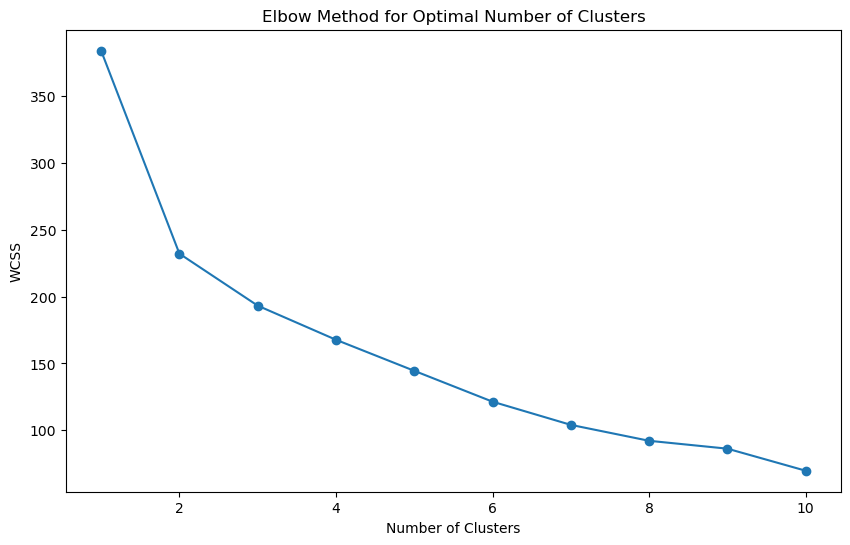

In [262]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_pollution)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()  

In [165]:
#From above plot ,our elbow point is at 3, we will be creating 3 clusters

In [228]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(scaled_pollution)

C:\Users\jssrs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [230]:
# Add cluster labels to the DataFrame
state_pollution['Cluster'] = clusters

In [264]:
# Evaluate the quality of clustering using Silhouette Score
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(scaled_pollution, clusters)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.23


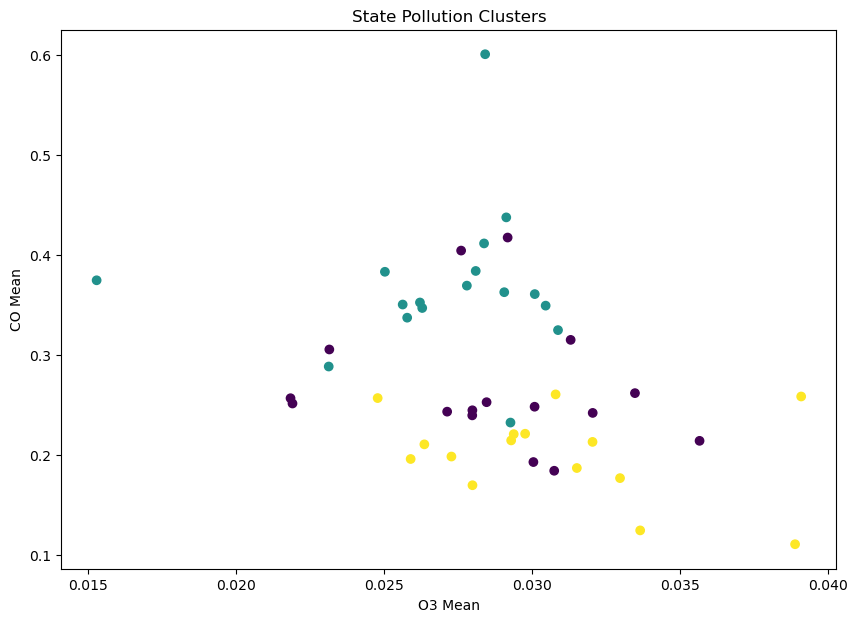

In [238]:
#visulaizing the clusters  
plt.figure(figsize=(10, 7))
plt.scatter(state_pollution['O3 Mean'], state_pollution['CO Mean'], c=clusters, cmap='viridis')
plt.xlabel('O3 Mean')
plt.ylabel('CO Mean')
plt.title('State Pollution Clusters')
plt.show()


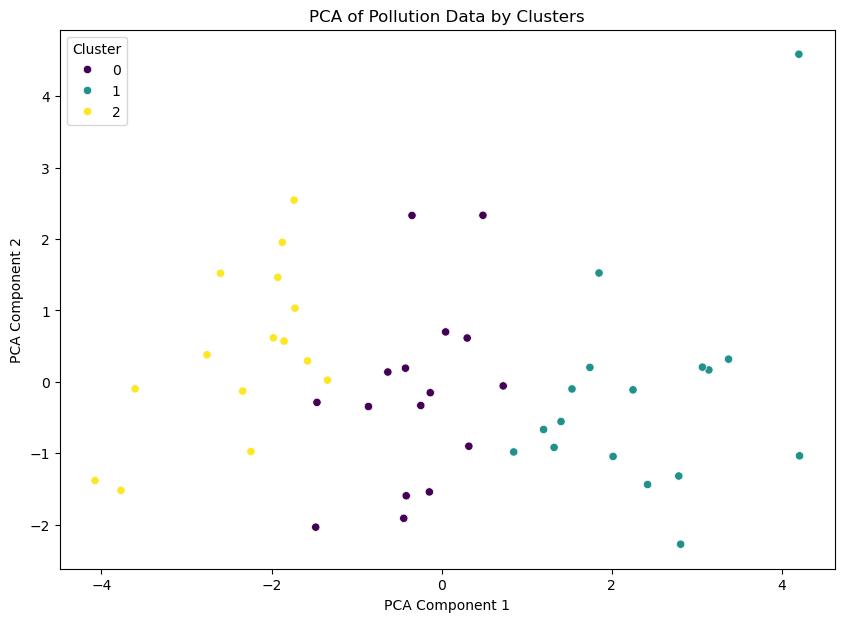

In [270]:
# Visualize the clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_pollution)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=state_pollution['Cluster'], palette='viridis')
plt.title('PCA of Pollution Data by Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [272]:
# Compare clusters by summarizing pollution levels within each cluster
cluster_summary = state_pollution.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
          O3 Mean   CO Mean  SO2 Mean   NO2 Mean     O3 AQI    CO AQI  \
Cluster                                                                 
0        0.028654  0.267118  0.862569  10.135674  38.332732  4.175165   
1        0.026987  0.368635  2.423895  13.870174  37.454906  5.871414   
2        0.030638  0.201256  0.564620   5.086851  36.731035  2.775450   

          SO2 AQI    NO2 AQI  
Cluster                       
0        3.275315  20.872160  
1        8.981068  25.530687  
2        1.714992  11.259508  


In [258]:
high_pollution_states_C1 = state_pollution[state_pollution['Cluster'] == 0]
print(high_pollution_states_C1)
high_pollution_states_C2 = state_pollution[state_pollution['Cluster'] == 1]
print(high_pollution_states_C2)
high_pollution_states_C3 = state_pollution[state_pollution['Cluster'] == 2]
print(high_pollution_states_C3)

                 O3 Mean   CO Mean  SO2 Mean   NO2 Mean     O3 AQI    CO AQI  \
State                                                                          
Alabama         0.027123  0.243276  0.858189   8.856462  38.189610  4.037477   
Arkansas        0.027595  0.404380  1.228945   9.272138  36.784171  5.654029   
Connecticut     0.030077  0.248208  0.741254   9.698991  38.987226  3.573574   
Delaware        0.028455  0.252740  0.668214  10.624430  36.439232  3.704839   
Florida         0.029166  0.417435  0.480078   6.457207  38.461776  5.709545   
Georgia         0.023142  0.305471  0.246250   9.707538  35.984329  5.036339   
Idaho           0.030036  0.192876  0.256170   9.320079  38.559079  2.960102   
Kentucky        0.030740  0.184158  2.565684  10.529480  44.491146  3.256761   
Nevada          0.033467  0.261808  0.389834  12.567614  43.876495  4.639049   
New Mexico      0.035650  0.214087  0.533809  10.438319  45.334090  3.407399   
North Carolina  0.031295  0.315065  1.00

In [274]:
#Inspect the states in each cluster
for cluster_id in range(optimal_clusters):
    print(f"\nStates in Cluster {cluster_id}:")
    print(state_pollution[state_pollution['Cluster'] == cluster_id].index.tolist())


States in Cluster 0:
['Alabama', 'Arkansas', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Idaho', 'Kentucky', 'Nevada', 'New Mexico', 'North Carolina', 'Ohio', 'Oregon', 'Texas', 'Utah', 'Washington']

States in Cluster 1:
['Alaska', 'Arizona', 'California', 'Colorado', 'District Of Columbia', 'Illinois', 'Indiana', 'Kansas', 'Louisiana', 'Massachusetts', 'Michigan', 'Missouri', 'New Jersey', 'New York', 'Pennsylvania', 'Virginia', 'Wisconsin']

States in Cluster 2:
['Hawaii', 'Iowa', 'Maine', 'Maryland', 'Minnesota', 'Mississippi', 'New Hampshire', 'North Dakota', 'Oklahoma', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Vermont', 'Wyoming']


### Detailed Steps Explanation:
Preprocessing:

Handling Missing Values: The code fills missing values with the mean of the columns.
Normalization: Standardization using StandardScaler ensures that each pollutant contributes equally.
Elbow Method:

Plots the within-cluster sum of squares (WCSS) for different numbers of clusters. The "elbow" in the plot indicates the optimal number of clusters.
K-Means Clustering:

Applies K-Means clustering with the optimal number of clusters determined from the Elbow Method.
Silhouette Score:

The Silhouette Score measures how similar each state is to its cluster compared to other clusters. A score closer to 1 indicates well-defined clusters.
Cluster Centers and Visualization:

Cluster Centers: The mean pollution levels for each cluster are analyzed to understand what characterizes each group.
PCA Visualization: The PCA plot provides a 2D view of the clusters, helping to visualize how the states are grouped.
Cluster Comparison:

Summarizes the pollution levels within each cluster to compare their characteristics. This can help identify which clusters represent the highest pollution levels.

Interpretation:
Cluster Centers: The values at the cluster centers show the average pollution levels for states within that cluster.
PCA Visualization: Helps in understanding the spread and separation of clusters in a reduced-dimensional space.

Cluster Summary: Provides a summary of the average pollution levels in each cluster, helping to identify which cluster corresponds to states with the highest levels of pollution.
